In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Fontconfig warning: ignoring UTF-8: not a valid region tag


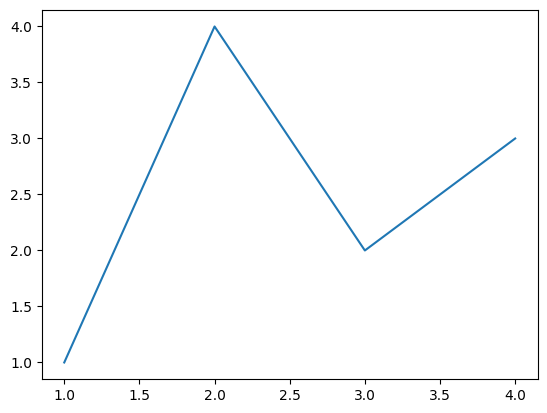

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

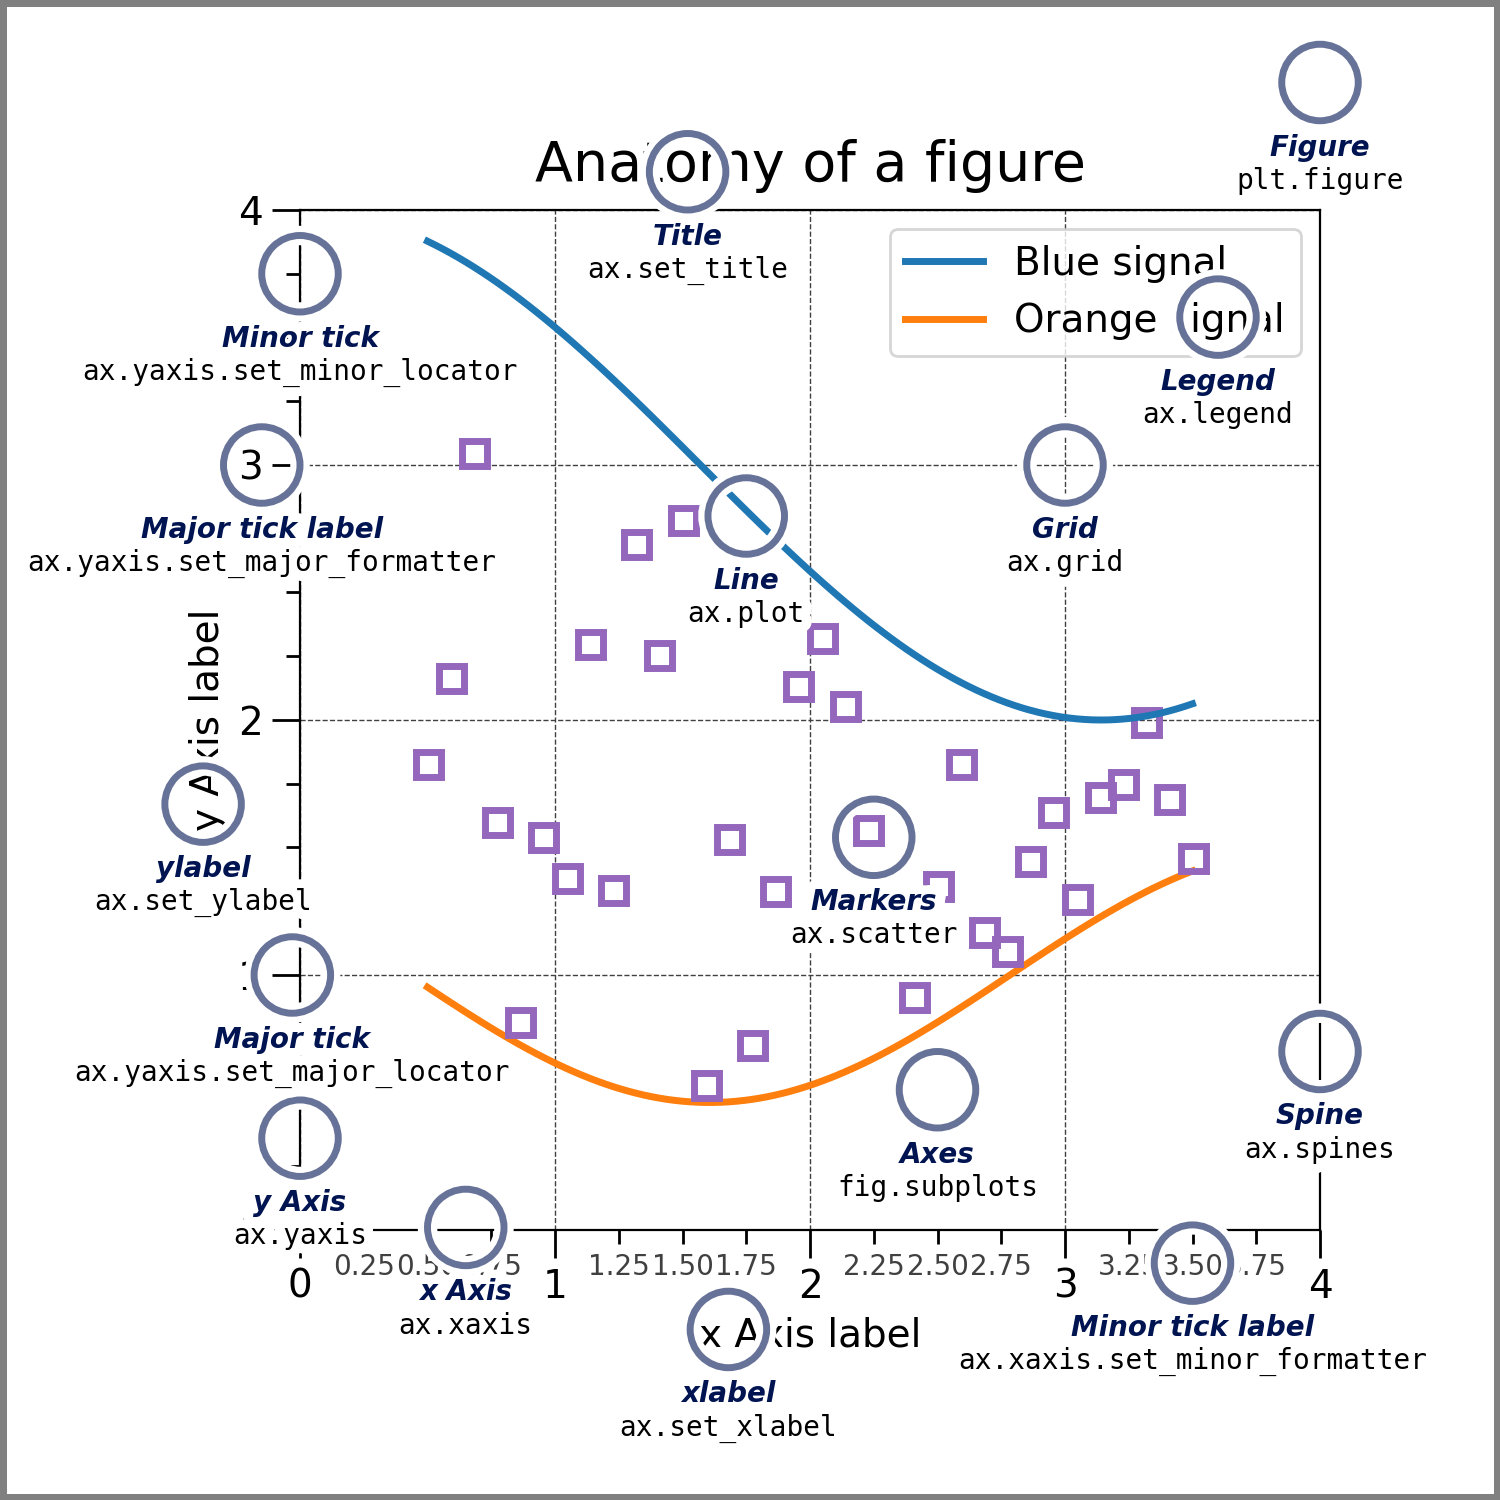

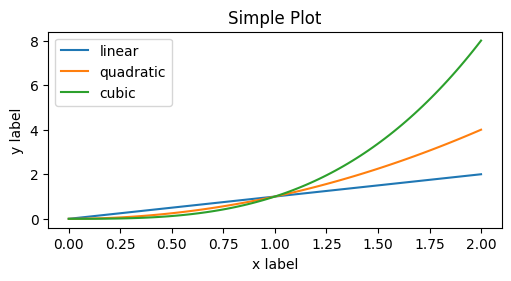

In [3]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

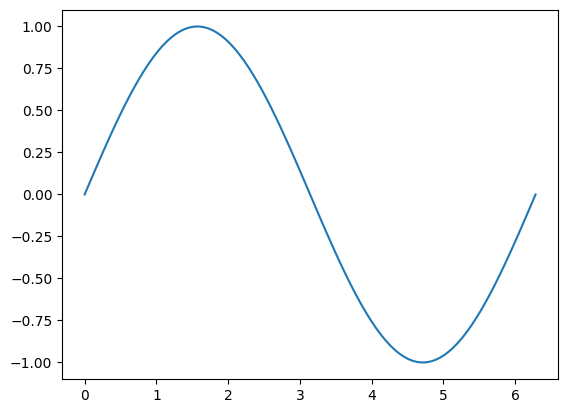

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

fig, ax = plt.subplots()

# animated=True tells matplotlib to only draw the artist when we
# explicitly request it
(ln,) = ax.plot(x, np.sin(x), animated=True)

# make sure the window is raised, but the script keeps going
plt.show(block=False)

# stop to admire our empty window axes and ensure it is rendered at
# least once.
#
# We need to fully draw the figure at its final size on the screen
# before we continue on so that :
#  a) we have the correctly sized and drawn background to grab
#  b) we have a cached renderer so that ``ax.draw_artist`` works
# so we spin the event loop to let the backend process any pending operations
plt.pause(0.1)

# get copy of entire figure (everything inside fig.bbox) sans animated artist
bg = fig.canvas.copy_from_bbox(fig.bbox)
# draw the animated artist, this uses a cached renderer
ax.draw_artist(ln)
# show the result to the screen, this pushes the updated RGBA buffer from the
# renderer to the GUI framework so you can see it
fig.canvas.blit(fig.bbox)

for j in range(100):
    # reset the background back in the canvas state, screen unchanged
    fig.canvas.restore_region(bg)
    # update the artist, neither the canvas state nor the screen have changed
    ln.set_ydata(np.sin(x + (j / 100) * np.pi))
    # re-render the artist, updating the canvas state, but not the screen
    ax.draw_artist(ln)
    # copy the image to the GUI state, but screen might not be changed yet
    fig.canvas.blit(fig.bbox)
    # flush any pending GUI events, re-painting the screen if needed
    fig.canvas.flush_events()
    # you can put a pause in if you want to slow things down
    # plt.pause(.1)

### Animation 
Use .py to visualize
[**Reference**](source=https://matplotlib.org/stable/api/animation_api.html)

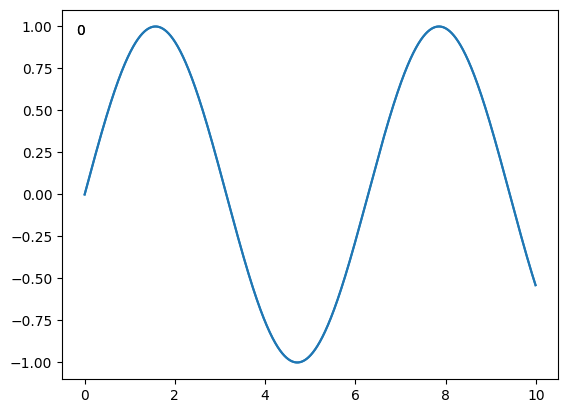

In [12]:
class BlitManager:
    def __init__(self, canvas, animated_artists=()):
        """
        Parameters
        ----------
        canvas : FigureCanvasAgg
            The canvas to work with, this only works for sub-classes of the Agg
            canvas which have the `~FigureCanvasAgg.copy_from_bbox` and
            `~FigureCanvasAgg.restore_region` methods.

        animated_artists : Iterable[Artist]
            List of the artists to manage
        """
        self.canvas = canvas
        self._bg = None
        self._artists = []

        for a in animated_artists:
            self.add_artist(a)
        # grab the background on every draw
        self.cid = canvas.mpl_connect("draw_event", self.on_draw)

    def on_draw(self, event):
        """Callback to register with 'draw_event'."""
        cv = self.canvas
        if event is not None:
            if event.canvas != cv:
                raise RuntimeError
        self._bg = cv.copy_from_bbox(cv.figure.bbox)
        self._draw_animated()

    def add_artist(self, art):
        """
        Add an artist to be managed.

        Parameters
        ----------
        art : Artist

            The artist to be added.  Will be set to 'animated' (just
            to be safe).  *art* must be in the figure associated with
            the canvas this class is managing.

        """
        if art.figure != self.canvas.figure:
            raise RuntimeError
        art.set_animated(True)
        self._artists.append(art)

    def _draw_animated(self):
        """Draw all of the animated artists."""
        fig = self.canvas.figure
        for a in self._artists:
            fig.draw_artist(a)

    def update(self):
        """Update the screen with animated artists."""
        cv = self.canvas
        fig = cv.figure
        # paranoia in case we missed the draw event,
        if self._bg is None:
            self.on_draw(None)
        else:
            # restore the background
            cv.restore_region(self._bg)
            # draw all of the animated artists
            self._draw_animated()
            # update the GUI state
            cv.blit(fig.bbox)
        # let the GUI event loop process anything it has to do
        cv.flush_events()
    # make a new figure
fig, ax = plt.subplots()
# add a line
(ln,) = ax.plot(x, np.sin(x), animated=True)
# add a frame number
fr_number = ax.annotate(
    "0",
    (0, 1),
    xycoords="axes fraction",
    xytext=(10, -10),
    textcoords="offset points",
    ha="left",
    va="top",
    animated=True,
)
bm = BlitManager(fig.canvas, [ln, fr_number])
# make sure our window is on the screen and drawn
plt.show(block=False)
plt.pause(.1)

for j in range(100):
    # update the artists
    ln.set_ydata(np.sin(x + (j / 100) * np.pi))
    fr_number.set_text("frame: {j}".format(j=j))
    # tell the blitting manager to do its thing
    bm.update()

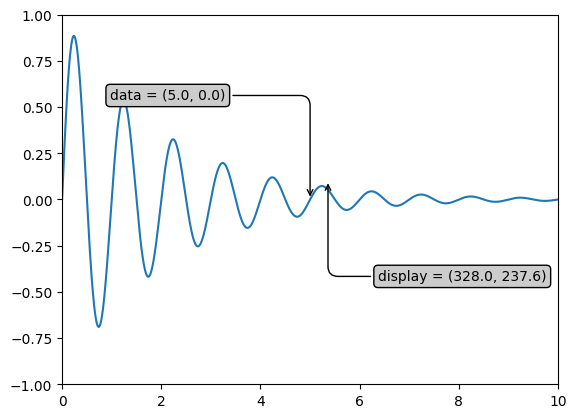

In [9]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
# This computing the transform now, if anything
# (figure size, dpi, axes placement, data limits, scales..)
# changes re-calling transform will get a different value.
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate('data = (%.1f, %.1f)' % (xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)

disp = ax.annotate('display = (%.1f, %.1f)' % (xdisplay, ydisplay),
                   (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
                   xycoords='figure pixels',
                   textcoords='offset points',
                   bbox=bbox, arrowprops=arrowprops)

plt.show()